<a href="https://colab.research.google.com/github/00BondViz/Using-Venna-AI/blob/main/Using_Venna_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vanna

In [3]:
#This part of the code speaks to the dependencies needed
import vanna
from vanna.remote import VannaDefault

In [4]:
# Venna requires use of api key, of which one can use instead of email everytime they would want to use it
api_key = vanna.get_api_key('00BondViz@gmail.com')


Check your email for the code and enter it here: FFPKUW


In [5]:
# For this demo we are going to use a public database known as Chinook Database
# https://www.sqlitetutorial.net/sqlite-sample-database/
vanna_model_name = 'chinook' # This is the name of the RAG model. This is typically associated with a specific dataset.
vn = VannaDefault(model=vanna_model_name, api_key=api_key)

In [6]:
# This part of the code speaks to the connection to the desired database
# You can connect to any SQL database, for the sake of the demo we are using SQLlite
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')


SELECT a.name,
       sum(il.quantity) as totalsales
FROM   artist a
    INNER JOIN album al
        ON a.artistid = al.artistid
    INNER JOIN track t
        ON al.albumid = t.albumid
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
GROUP BY a.name
ORDER BY totalsales desc limit 5;


,Name,totalsales
0,Iron Maiden,140
1,U2,107
2,Metallica,91
3,Led Zeppelin,87
4,Os Paralamas Do Sucesso,45


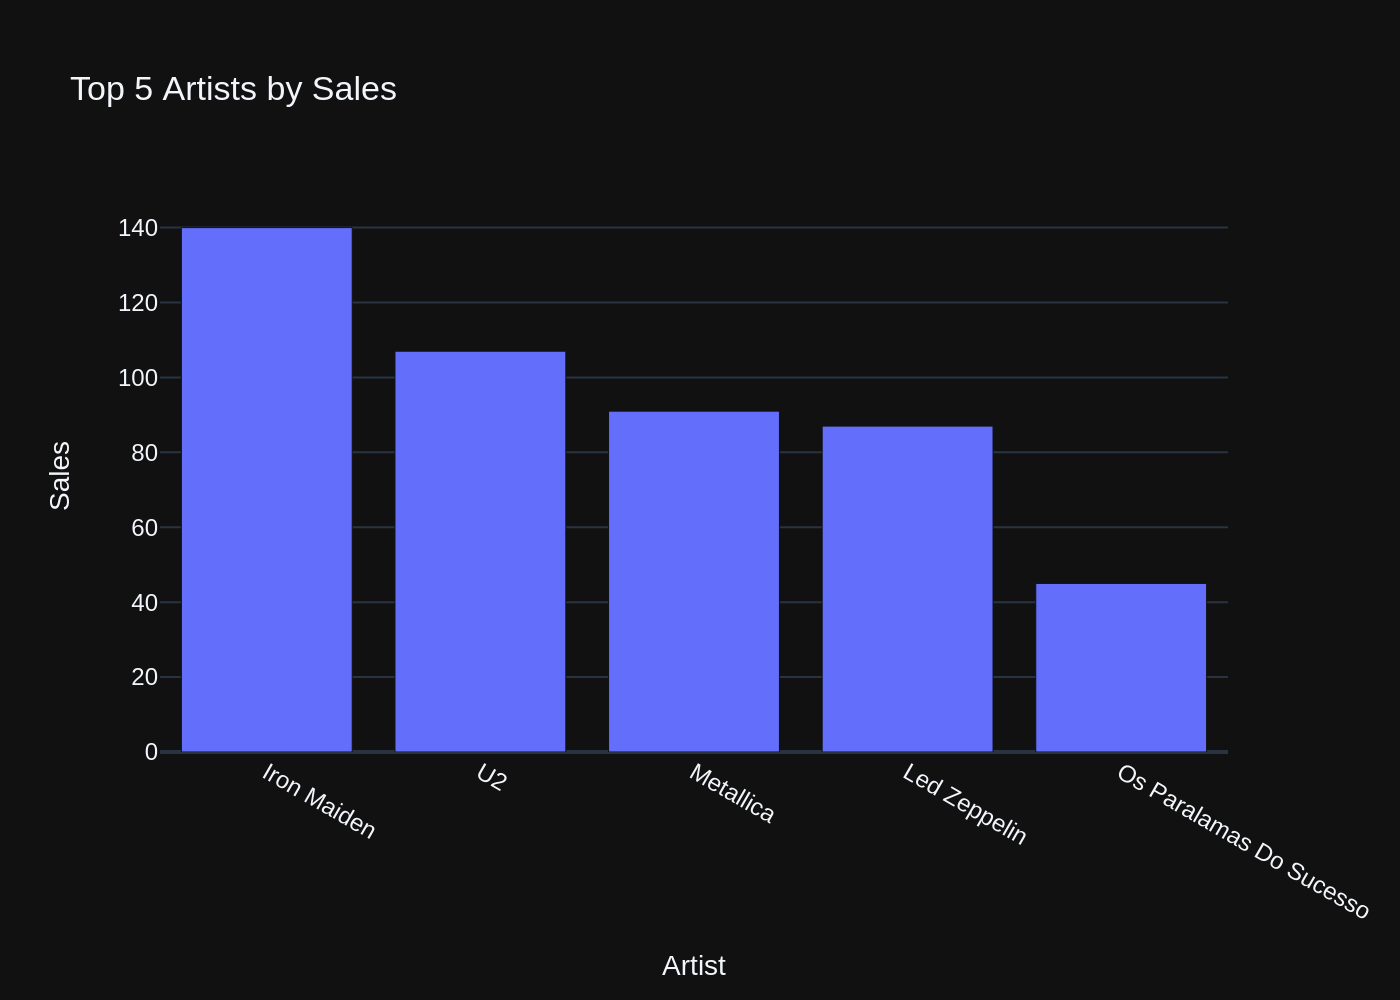

In [7]:
# With the use of the vn.ask we can ask questions and it will generate SQL queries and show tables and generate a chart
vn.ask("What are the top 5 artists by sales?")

SELECT p.name,
       COUNT(pt.trackid) as total_tracks
FROM   playlist p join playlisttrack pt
        ON p.playlistid = pt.playlistid
GROUP BY p.name
ORDER BY total_tracks desc
LIMIT 5;


,Name,total_tracks
0,Music,6580
1,90’s Music,1477
2,TV Shows,426
3,Classical,75
4,Brazilian Music,39


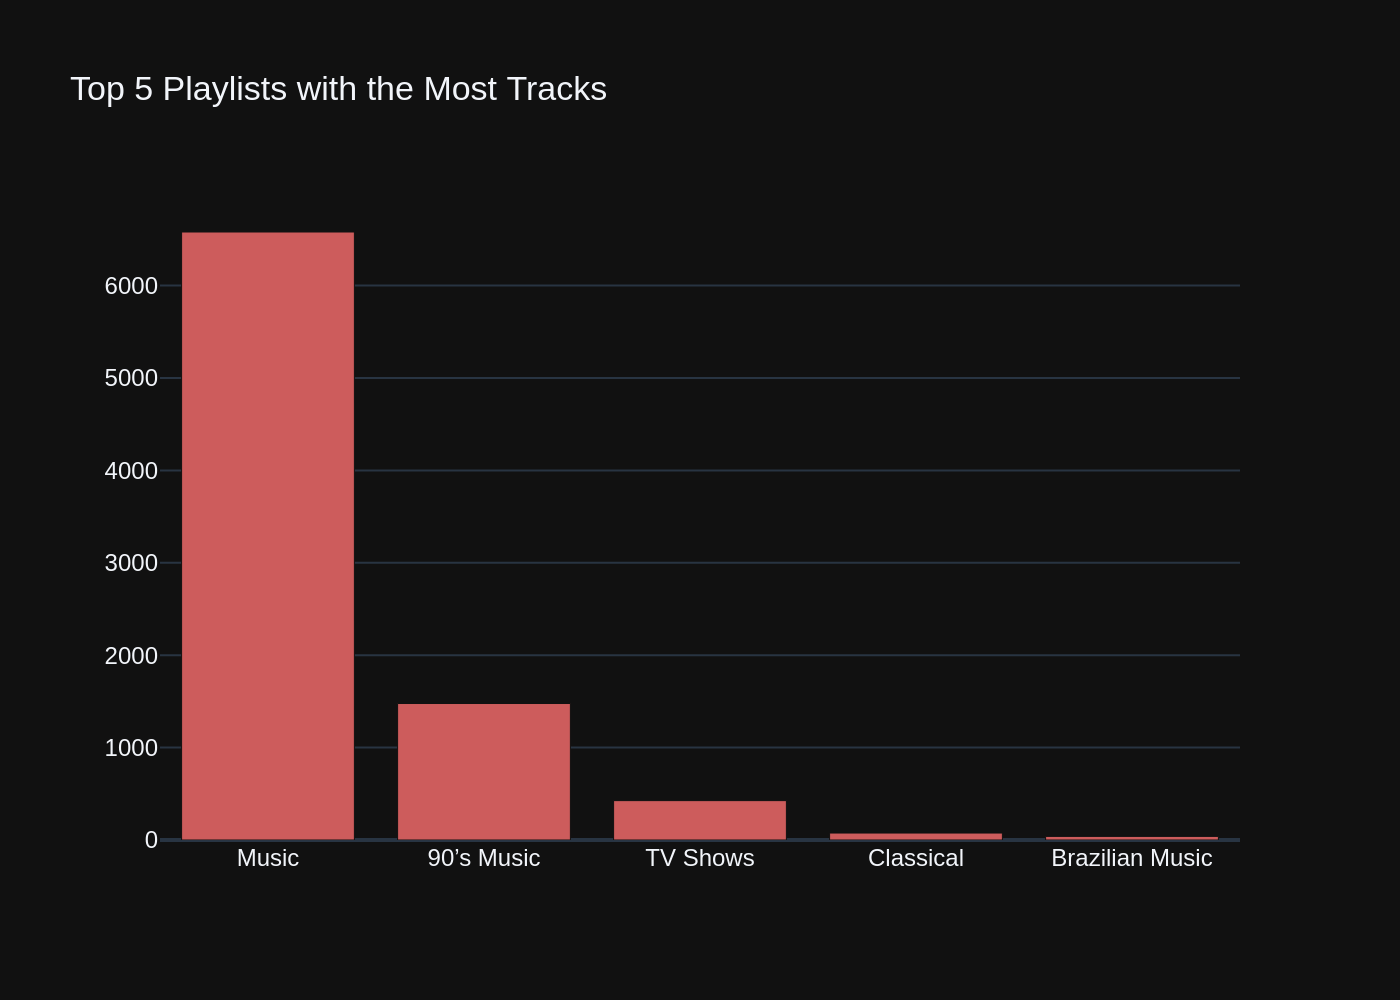

In [8]:
vn.ask("What are the top 5 playlists with the most tracks?")

SELECT mt.Name AS MediaType, COUNT(*) AS TotalPurchases
FROM MediaType mt
JOIN Track t ON mt.MediaTypeId = t.MediaTypeId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY mt.Name
ORDER BY TotalPurchases DESC
LIMIT 5;


,MediaType,TotalPurchases
0,MPEG audio file,1976
1,Protected AAC audio file,146
2,Protected MPEG-4 video file,111
3,Purchased AAC audio file,4
4,AAC audio file,3


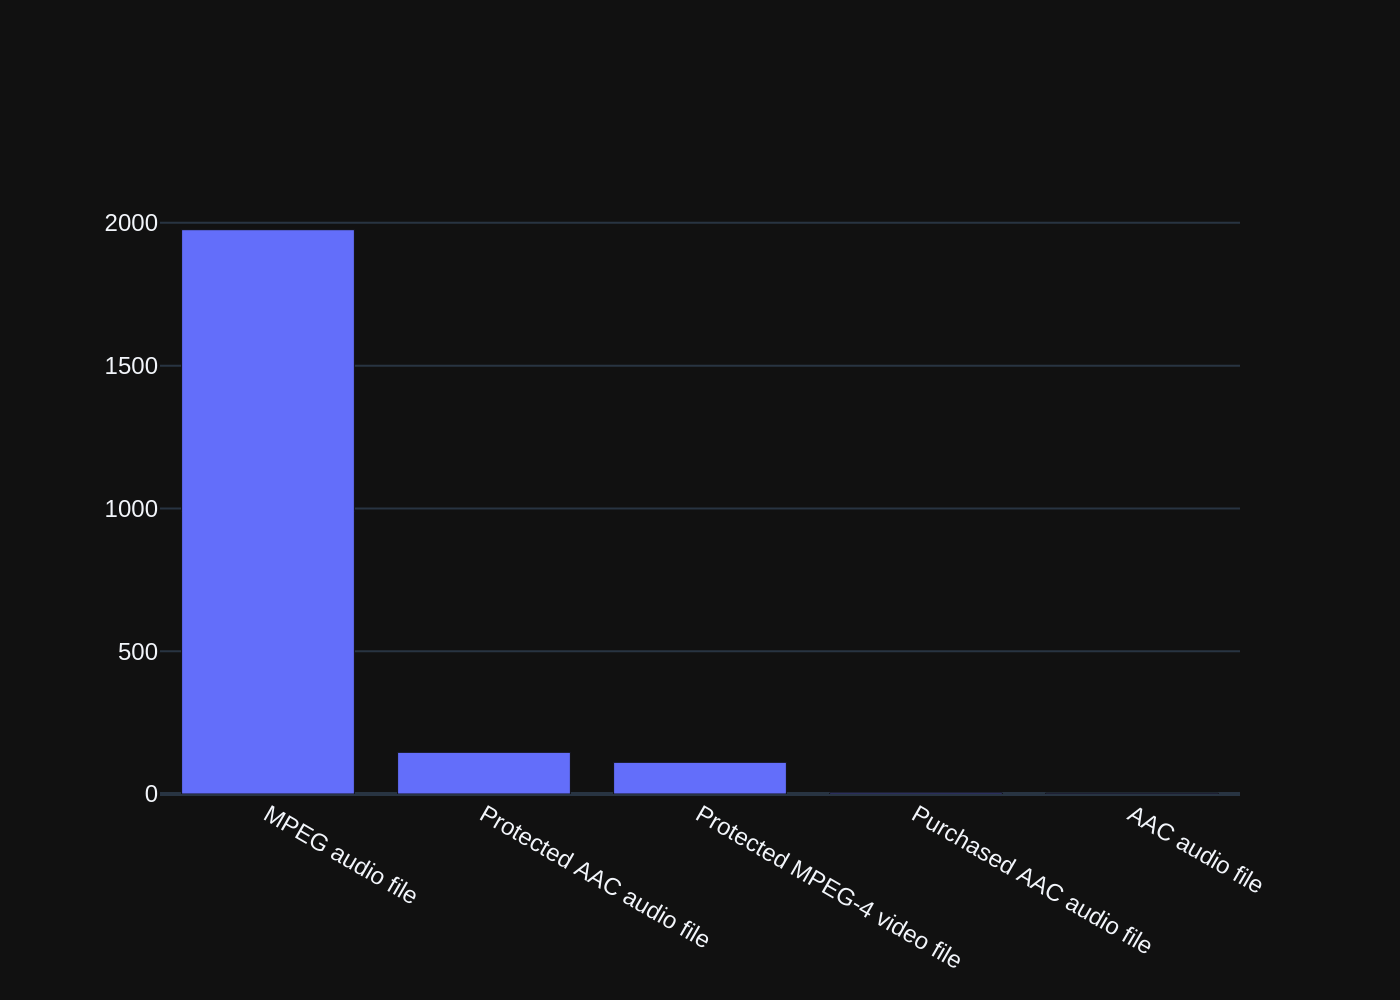

In [9]:
vn.ask("What are the top 5 media types that are most frequently purchased?")

In [10]:
# using flask with Venna
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()


<IPython.core.display.Javascript object>

Your app is running at:
https://zklo65uzp7n-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
